<a href="https://colab.research.google.com/github/kathy-oviedo/MinTicBootcamp/blob/main/Ejercicio_3_base_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.2 MB/s eta 0:00:00


In [ ]:
import mysql.connector

# Establecer la conexión
conexion = mysql.connector.connect(
    host="bmj27qevxyyx5sgbuqvu-mysql.services.clever-cloud.com",    # Cambiar a la dirección IP o nombre de host de tu servidor MySQL si es diferente
    user="uina3ykrakjsh37x",   # Nombre de usuario de tu base de datos
    password="v5ICl4TFGIYlzlY6ZP5O", # Contraseña de tu base de datos
    database="bmj27qevxyyx5sgbuqvu" # Nombre de la base de datos a la que te quieres conectar
)

# Verificar si la conexión fue exitosa
if conexion.is_connected():
    print("Conexión exitosa a la base de datos")
else:
    print("Error en la conexión")


Conexión exitosa a la base de datos


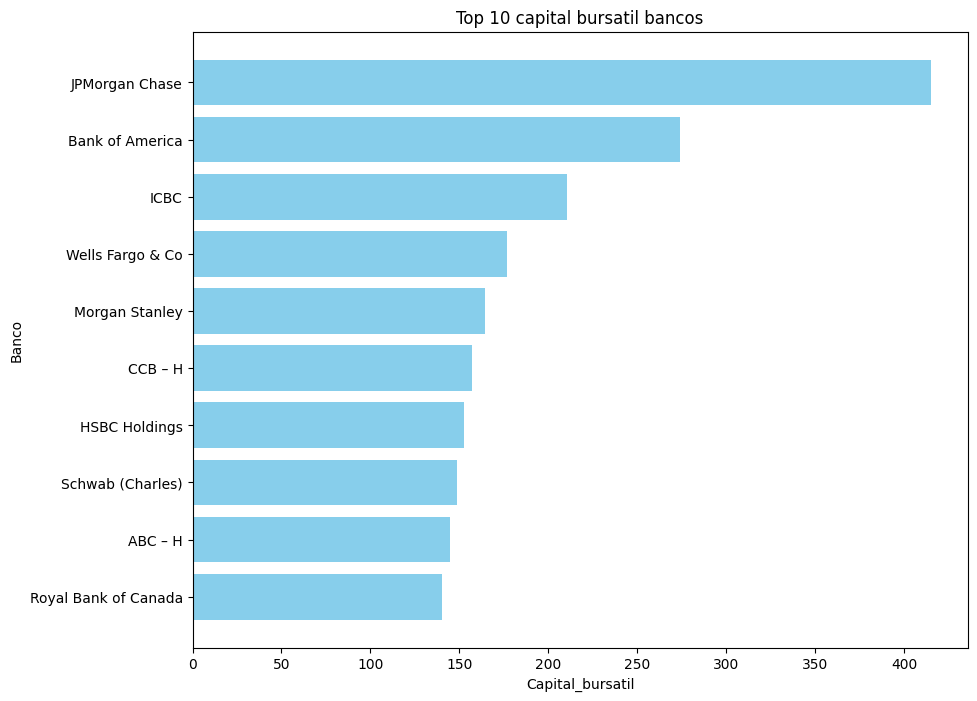

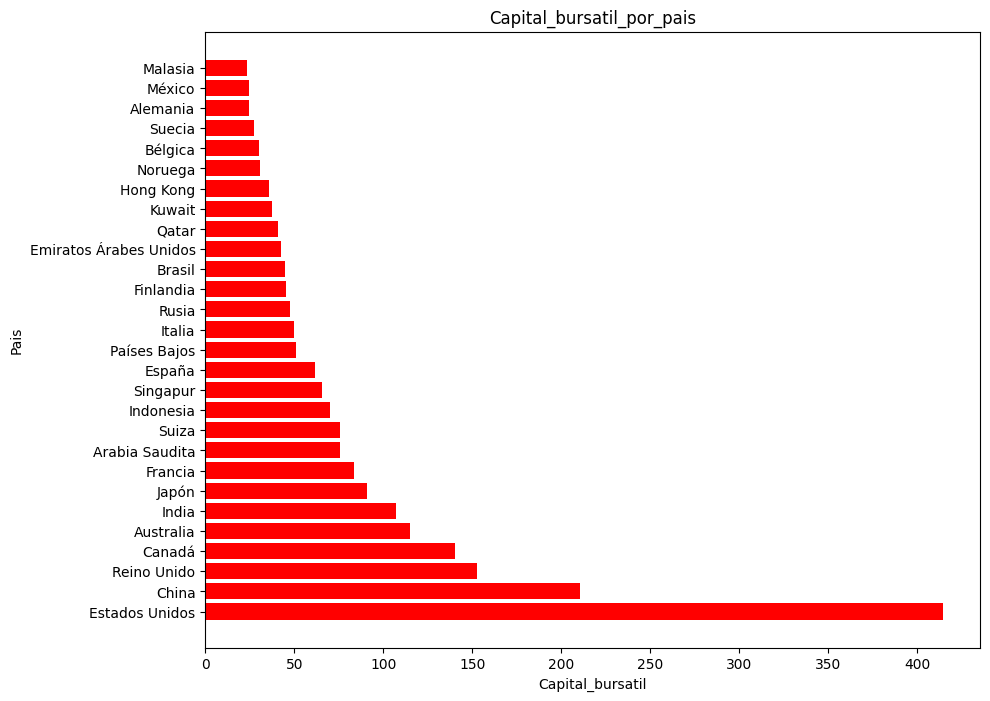

In [ ]:
#importar datos de base de datos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

def connect_to_database():
    return mysql.connector.connect(
      host="bmj27qevxyyx5sgbuqvu-mysql.services.clever-cloud.com",
      user="uina3ykrakjsh37x",
      password="v5ICl4TFGIYlzlY6ZP5O",
      database="bmj27qevxyyx5sgbuqvu"
    )

def fetch_data(query):
    db = connect_to_database()
    cursor = db.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    cursor.close()
    db.close()
    return result

def plot_most_capital_bursatil_bancos():
    query = """
    SELECT Banco, Capital_bursatil
    FROM banco_rank
    ORDER BY Capital_bursatil DESC
    LIMIT 10;
    """
    result = fetch_data(query)
    df = pd.DataFrame(result, columns=['Banco', 'Capital_bursatil'])

    plt.figure(figsize=(10, 8))
    plt.barh(df['Banco'], df['Capital_bursatil'], color='skyblue')
    plt.xlabel('Capital_bursatil')
    plt.ylabel('Banco')
    plt.title('Top 10 capital bursatil bancos')
    plt.gca().invert_yaxis()
    plt.show()

def capital_bursatil_por_pais():
    query = """
    SELECT Pais, Capital_bursatil
    FROM banco_rank
    GROUP BY Pais
    ORDER BY Capital_bursatil ASC;
    """
    result = fetch_data(query)
    df = pd.DataFrame(result, columns=['Pais', 'Capital_bursatil'])

    plt.figure(figsize=(10, 8))
    plt.barh(df['Pais'], df['Capital_bursatil'], color='red')
    plt.xlabel('Capital_bursatil')
    plt.ylabel('Pais')
    plt.title('Capital_bursatil_por_pais')
    plt.gca().invert_yaxis()
    plt.show()


if __name__ == "__main__":
    plot_most_capital_bursatil_bancos()
    capital_bursatil_por_pais()